In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('../data/student-mat.csv', sep=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
((df.isnull().sum().sum())/ (df.shape[0] * df.shape[1])) * 100

np.float64(0.0)

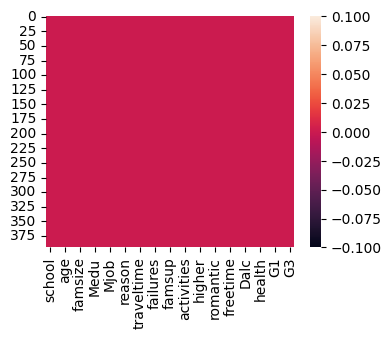

In [5]:
plt.figure(figsize=(4,3))
sns.heatmap(df.isnull())
plt.show()

In [6]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [7]:
binary_map = {
    'GP': 0, 'MS': 1,
    'F': 0, 'M': 1,
    'U': 0, 'R': 1,
    'LE3': 0, 'GT3': 1,
    'T': 1, 'A': 0,
    'yes': 1, 'no': 0
}

binary_columns = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic'
]

df[binary_columns] = df[binary_columns].applymap(lambda x: binary_map[x])


C:\Users\PMLS\AppData\Local\Temp\ipykernel_9424\1723674609.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_columns] = df[binary_columns].applymap(lambda x: binary_map[x])


In [8]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,0,1,0,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,0,1,1,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,0,0,1,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [9]:
# Columns to apply One-Hot Encoding
one_hot_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

# Apply one-hot encoding and replace original columns
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True ,dtype=int)


In [10]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,18,0,1,0,4,4,2,2,...,0,0,0,0,1,0,0,0,1,0
1,0,0,17,0,1,1,1,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,0,0,15,0,0,1,1,1,1,2,...,0,0,1,0,0,0,1,0,1,0


In [11]:
pd.set_option('display.max_columns', None)
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,16.696203,0.222785,0.711392,0.896203,2.749367,2.521519,1.448101,2.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,0.086076,0.356962,0.260759,0.146835,0.045570,0.549367,0.281013,0.073418,0.275949,0.091139,0.265823,0.691139,0.081013
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,0.280832,0.479711,0.439606,0.354391,0.208814,0.498188,0.450064,0.261152,0.447558,0.288172,0.442331,0.462610,0.273201
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


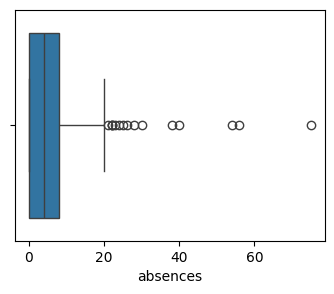

In [12]:
plt.figure(figsize=(4,3))
sns.boxplot(x='absences',data=df) # this will give the box plot of the Principal column
plt.show()

In [13]:
# List of columns you want to check for outliers
columns_to_check = ['absences', 'G1', 'G2', 'G3']

# Loop through each column and filter out the outliers
for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only the rows within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


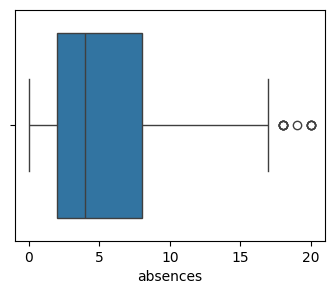

In [14]:
plt.figure(figsize=(4,3))
sns.boxplot(x='absences',data=df) # this will give the box plot of the Principal column
plt.show()

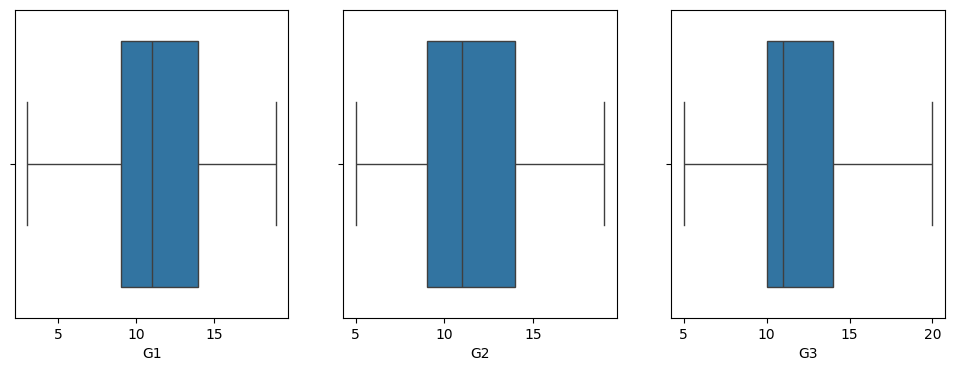

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x='G1',data=df) # this will give the box plot of the G1 column
plt.subplot(1,3,2)
sns.boxplot(x='G2',data=df) # this will give the box plot of the G2 column
plt.subplot(1,3,3)
sns.boxplot(x='G3',data=df) # this will give the box plot of
plt.show()


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,0.122807,0.494152,16.625731,0.222222,0.698830,0.894737,2.771930,2.532164,1.426901,2.049708,0.260234,0.140351,0.611111,0.476608,0.511696,0.801170,0.961988,0.830409,0.295322,3.959064,3.274854,3.096491,1.497076,2.318713,3.567251,5.114035,11.298246,11.397661,11.578947,0.093567,0.353801,0.257310,0.152047,0.052632,0.549708,0.274854,0.073099,0.257310,0.102339,0.274854,0.692982,0.070175
std,0.328696,0.500698,1.265483,0.416349,0.459438,0.307342,1.102131,1.090006,0.692804,0.839206,0.671671,0.347860,0.488212,0.500184,0.500596,0.399705,0.191505,0.375823,0.456856,0.895454,0.995833,1.088214,0.930892,1.297709,1.393274,4.981065,3.227257,3.126801,3.193362,0.291652,0.478849,0.437792,0.359592,0.223624,0.498252,0.447095,0.260681,0.437792,0.303538,0.447095,0.461933,0.255817
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000,9.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,17.000000,0.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,18.000000,0.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000,14.000000,14.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,20.000000,19.000000,19.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


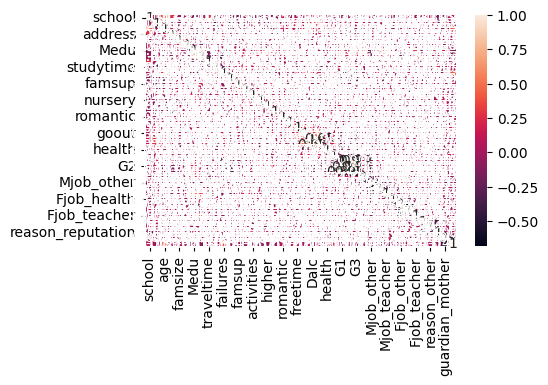

In [18]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(), annot=True)
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_9424\56465069.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)  # this will give the distribution plot


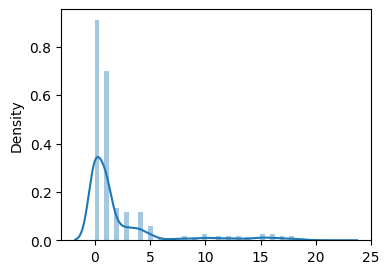

In [19]:
plt.figure(figsize=(4,3))
sns.distplot(df)  # this will give the distribution plot 
plt.show()

In [20]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
# List of columns to apply log1p
cols_to_transform = ['G1', 'G2', 'absences','age']

# Create a FunctionTransformer
ft = FunctionTransformer(np.log1p, validate=False)

# Apply transformation
df[cols_to_transform] = ft.fit_transform(df[cols_to_transform])


C:\Users\PMLS\AppData\Local\Temp\ipykernel_9424\56465069.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)  # this will give the distribution plot


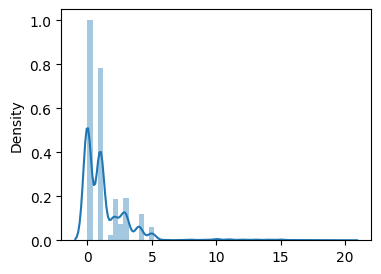

In [21]:
plt.figure(figsize=(4,3))
sns.distplot(df)  # this will give the distribution plot 
plt.show()

In [22]:
df['G1'].isnull().sum()

np.int64(0)

In [23]:
from sklearn.feature_selection import SequentialFeatureSelector


In [24]:
X= df.drop(columns=['G3'], axis=1)
y= df['G3']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# You can choose forward=True for forward selection, or False for backward
sfs = SequentialFeatureSelector(model, 
                                 n_features_to_select=18,  # or set to specific number like 10
                                 direction='forward',          # or 'backward'
                                 scoring='r2', 
                                 cv=5, 
                                 n_jobs=-1)

sfs.fit(X_train, y_train)


,estimator,LinearRegression()
,n_features_to_select,18
,tol,None
,direction,'forward'
,scoring,'r2'
,cv,5
,n_jobs,-1
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [27]:
selected_features = X_train.columns[sfs.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['Fedu', 'failures', 'schoolsup', 'paid', 'activities', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'health', 'G1', 'G2',
       'Mjob_other', 'Fjob_other', 'Fjob_teacher', 'reason_home',
       'reason_reputation'],
      dtype='object')


In [28]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model.fit(X_train_selected, y_train)
score = model.score(X_test_selected, y_test)

print(f"Model R² Score with selected features: {score}")


Model R² Score with selected features: 0.9023644293876304


In [29]:
train_score = model.score(X_train_selected, y_train)
test_score = model.score(X_test_selected, y_test)
print(f"Train Score: {train_score}, Test Score: {test_score}")


Train Score: 0.9122400495151245, Test Score: 0.9023644293876304


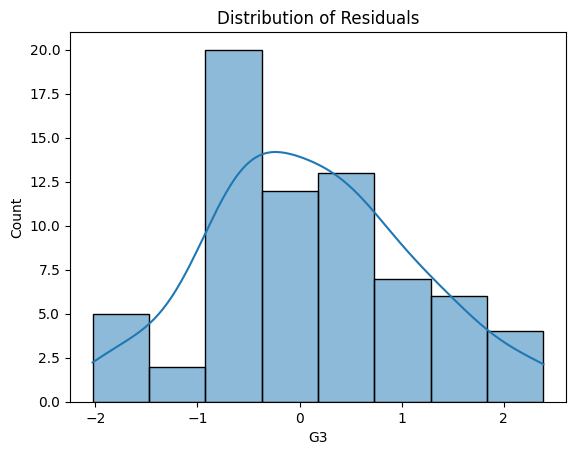

In [30]:
y_pred = model.predict(X_test_selected)
residuals = y_test - y_pred

sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()